In [346]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random



#import seaborn as sns; sns.set_theme(color_codes=True)
import math

import numpy as np
import matplotlib.pyplot as plt
#New import statement
import scipy.optimize as fitter
import csv

In [347]:
os.chdir("/home/arjun/SIP/github/Science-Internsip-Program-/full/")
# For mac /Users/ArjunShrivastava/School/SIP/Astronomy Notebooks/Astronomy SIP Projects/AstronomyLab/Moving Median Model /full"
my_files = glob.glob('*.mjdmag')
#print(my_files[9])
print(len(my_files))
#ranger = 100 #This dictates the number of objects
uOutput = [] 
gOutput = []
rOutput = []
iOutput = []
i2Output = []
zOutput = []
"""These 2D lists contain the raw data for each filter"""


u_timeMedian = []
g_timeMedian = []
r_timeMedian =[]
i_timeMedian = []
i2_timeMedian = []
z_timeMedian = []

"""There are lists inside these lists, and each inner list contains a tuple of the median time and median magnitude"""


timeAxisU = []
magAxisU = []

timeAxisG = []
magAxisG = []  

timeAxisR = []
magAxisR = []

timeAxisI = []
magAxisI = []

timeAxisI2 = []
magAxisI2 = []

timeAxisZ = []
magAxisZ = []


28108


In [348]:
def is_space(e):
    # This function removes the spaces in each line in the objectFile array.
    return e != ''

count = 0
def read_one_object(filepath):
    allow = True
    # This function reads data file for a specific object returns the data for the specfied filters.

    #print(filepath)
    objectFile = np.loadtxt(filepath, skiprows=14, delimiter='\n', unpack=1, dtype=str)
    # Here we get all the data from a single file. The delimeter gives the criteria of how the data is seperated in the array.


    # Initialized lists where we put the MDJ and Magnitude.

    for line in objectFile:
        #         print("Line :", line)
        try:
            x = line.split(" ")
        except TypeError as ke:
            return [], [], [], [], [], []
            
        #         print(x)
        x = list(filter(is_space, x))
        # print(x[0], x[1], x[8])
        # Using split and filter, we remove all the spaces in a single line so there are no indexs where there are spaces.

        data = (float(x[0]), float(x[1]))
        #print(data)

        if (x[8] == 'U'):
            uOutput.append(data)

        elif (x[8] == 'G'):
            gOutput.append(data)
        elif (x[8] == 'R'):
            rOutput.append(data)

        elif (x[8] == 'I'):
            iOutput.append(data)

        elif (x[8] == 'I2'):
            i2Output.append(data)
        elif (x[8] == 'Z'):
            zOutput.append(data)
            # This for loop appends the data from x (each line) and appends it to the specified filter array


    return uOutput, gOutput, rOutput, iOutput, i2Output, zOutput

DExtra =  ['CFHTLS-VAR-J221351.65-174649.0.mjdmag', 'CFHTLS-VAR-J221418.71-171754.4.mjdmag', 'CFHTLS-VAR-J221611.68-174805.1.mjdmag', 'CFHTLS-VAR-J221556.26-180356.2.mjdmag', 'CFHTLS-VAR-J022515.65-045402.7.mjdmag', 'CFHTLS-VAR-J022503.74-040056.3.mjdmag', 'CFHTLS-VAR-J221502.76-180913.6.mjdmag', 'CFHTLS-VAR-J221409.22-173554.5.mjdmag', 'CFHTLS-VAR-J221434.62-174656.6.mjdmag', 'CFHTLS-VAR-J221504.89-173554.3.mjdmag', 'CFHTLS-VAR-J221639.61-174630.1.mjdmag', 'CFHTLS-VAR-J022655.29-041210.8.mjdmag', 'CFHTLS-VAR-J100145.98+022028.6.mjdmag', 'CFHTLS-VAR-J141831.11+524240.6.mjdmag', 'CFHTLS-VAR-J221327.43-180418.0.mjdmag', 'CFHTLS-VAR-J221509.62-173416.6.mjdmag', 'CFHTLS-VAR-J142153.24+525202.7.mjdmag', 'CFHTLS-VAR-J095842.97+022050.7.mjdmag', 'CFHTLS-VAR-J221719.34-172213.9.mjdmag', 'CFHTLS-VAR-J221330.99-171840.3.mjdmag', 'CFHTLS-VAR-J221509.85-180606.3.mjdmag', 'CFHTLS-VAR-J022440.99-042733.9.mjdmag', 'CFHTLS-VAR-J141740.32+524351.0.mjdmag']
        #ind = random.randrange(0, 1000, 1)
D1evar2 = []
for i in DExtra:
    #i = i + ".mjdmag"
    D1evar2.append(i)

x = 0
for i in D1evar2:
    #print(i)
    f = open(i)
    print(f.readlines()[1], x)
    x = x + 1

fileName = "CFHTLS-VAR-J221636.70-173440.8.mjdmag"
try:
    uOutput, gOutput, rOutput, iOutput, i2Output, zOutput = read_one_object(fileName)
except TypeError as ke:
    uOutput[i], gOutput[i], rOutput[i], iOutput[i], i2Output[i], zOutput[i] = [0], [0], [0], [0], [0], [0]
          
#print(uOutput, len(uOutput[0]) + len(gOutput[0]) + len(rOutput[0])+ len(iOutput[0]) + len(i2Output[0]) + len(zOutput[0]))

# RA,Dec: 333.6335254 -17.7813123
 0
# RA,Dec: 333.9781724 -17.3005293
 1
# RA,Dec: 334.1091383 -17.8034835
 2
# RA,Dec: 334.0548776 -18.0654330
 3
# RA,Dec: 036.4494390 -04.9035096
 4
# RA,Dec: 036.1118011 -04.0165189
 5
# RA,Dec: 334.0371631 -18.1534729
 6
# RA,Dec: 333.6485786 -17.6035147
 7
# RA,Dec: 333.7516457 -17.7828604
 8
# RA,Dec: 333.6614593 -17.5984784
 9
# RA,Dec: 334.3840753 -17.7773516
 10
# RA,Dec: 036.6164821 -04.2017876
 11
# RA,Dec: 149.8516697 +02.3398711
 12
# RA,Dec: 214.8552559 +52.7111843
 13
# RA,Dec: 333.6634715 -18.0702780
 14
# RA,Dec: 334.0369480 -17.5707098
 15
# RA,Dec: 215.1031891 +52.8689618
 16
# RA,Dec: 149.8525440 +02.3426173
 17
# RA,Dec: 333.9430335 -17.3708576
 18
# RA,Dec: 334.1822423 -17.3131816
 19
# RA,Dec: 334.1858561 -18.1014762
 20
# RA,Dec: 036.4219640 -04.4590306
 21
# RA,Dec: 214.6883716 +52.7289533
 22


In [349]:
def key_func(t):
    return t[1]
t = [(0,4),(3,6), (1,3),(-1,4)]
u = sorted(t,key=key_func)


def time_func(filterType):
    return t[0]
#We specify to sort only the MJD's in the tuples.


# Array of time medians and mag medians.
filterID = ""


def sorter(filterType, filterID):
    # print("x", filterID)
    # if(filterID == uOutput):
    #  filterID == "uOutput"
    #     if(filterID == gOutput):
    #
    # filterID == "gOutput"
    #     if(filterID == rOutput):
    #          filterID == "rOutput"
    #     if(filterID == iOutput):
    #          filterID == "iOutput"
    #     if(filterID == i2Output):
    #          filterID == "i2Output"
    #     if(filterID == zOutput):
    #          filterID == "zOutput"

    filterSORTED = sorted(filterType, key=time_func)
    # print(filterSORTED)
    return MedMaker(filterSORTED, filterID)

# Call the sorting funtion to order the tuples in the list by time.
# print(uOutputSORTED)
# uOutputSORTED contains the list where the tuples are organized by time.
def mag_func(filterType):
    return t[1]


# Sorting function to sort the tuples by magnitude in the U list.


def MedMaker(filterSORTED, filterID):
   # print("x", filterID)

    start = 0
    end = 72
    med = 36
   # print(filterID)
    while (end < len(filterSORTED)):

        # Allows us to record the median values.
        # print(med)
        # print(uOutputSORTED[med][0], med)
        timeMed = filterSORTED[med][0]
        # We put the index of the median into the sorted time array to get the median value.

        tempArray = filterSORTED[start:end + 1]
        # Temporarily, we put the the current the mangitudes 19 points of time in this run of the loop into an array.
        # The start and end keep appending to make it a moving median.
        tempArraySORTED = sorted(tempArray, key=mag_func)

        if (filterID == "uOutput"):
            # print(True)
            u_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return u_timeMedian

        if (filterID == "gOutput"):
            g_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return g_timeMedian

        if (filterID == "rOutput"):
            r_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return r_timeMedian

        if (filterID == "iOutput"):
            i_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return i_timeMedian

        if (filterID == "i2Output"):
            i2_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return i2_timeMedian

        if (filterID == "zOutput"):
            z_timeMedian.append((timeMed, tempArraySORTED[9][1]))
            if (end + 1 == len(filterSORTED)):
                return z_timeMedian

        start += 1
        med += 1
        end += 1

In [350]:
def collectMedians():
    """This function calls the functions above to exceute the moving median procces """

    sorter(uOutput, "uOutput")
    sorter(gOutput, "gOutput")
    sorter(rOutput, "rOutput")
    sorter(iOutput, "iOutput")
    sorter(i2Output, "i2Output")
    sorter(zOutput, "zOutput")

collectMedians()

In [351]:
def coList():
    for t in u_timeMedian:
        timeAxisU.append(t[0])
        magAxisU.append(t[1])
    for t in g_timeMedian:
        timeAxisG.append(t[0])
        magAxisG.append(t[1])

    for t in r_timeMedian:
        timeAxisR.append(t[0])
        magAxisR.append(t[1])
    for t in i_timeMedian:
        timeAxisI.append(t[0])
        magAxisI.append(t[1])
    for t in i2_timeMedian:
        timeAxisI2.append(t[0])
        magAxisI2.append(t[1])
    for t in z_timeMedian:
        timeAxisZ.append(t[0])
        magAxisZ.append(t[1])
coList() 


In [352]:
origUTime = []
origUMag = []

origGTime = []
origGMag = []

origRTime = []
origRMag = []

origITime = []
origIMag = []

origI2Time = []
origI2Mag= []

origZTime = []
origZMag = []
"""These lists are initilized to split the raw time and magnitude so we can plot them"""
for tup in uOutput:
    origUTime.append(tup[0])
    origUMag.append(tup[1])
for tup in gOutput:
    origGTime.append(tup[0])
    origGMag.append(tup[1])
for tup in rOutput:
    origRTime.append(tup[0])
    origRMag.append(tup[1])
for tup in iOutput:
    origITime.append(tup[0])
    origIMag.append(tup[1])
for tup in i2Output:
    origI2Time.append(tup[0])
    origI2Mag.append(tup[1])
for tup in zOutput:
    origZTime.append(tup[0])
    origZMag.append(tup[1])

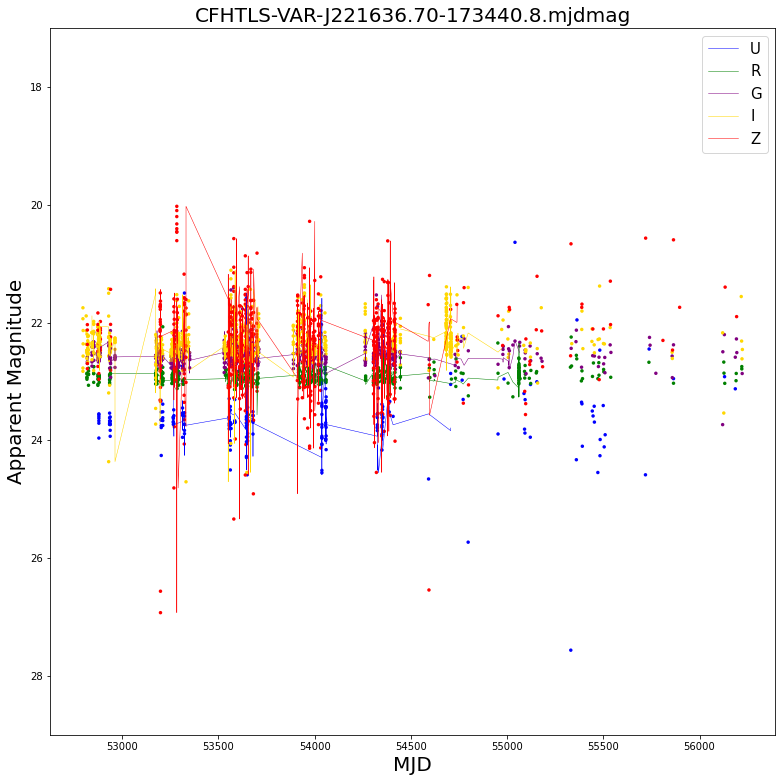

In [353]:
f = plt.figure()
f.set_figwidth(13)
f.set_figheight(13)

plt.scatter(origUTime, origUMag,  c='blue', edgecolors='none', s=12)
plt.scatter(origGTime, origGMag,  c='green', edgecolors='none', s=12)
plt.scatter(origRTime, origRMag,  c='purple', edgecolors='none', s=12)
plt.scatter(origITime, origIMag,  c='gold', edgecolors='none', s=12)
plt.scatter(origI2Time, origI2Mag,  c='gold', edgecolors='none', s=12)
plt.scatter(origZTime, origZMag,  c='red', edgecolors='none', s=12)
plt.plot(timeAxisU, magAxisU, c='blue', label = "U", linewidth = 0.5)
plt.plot(timeAxisG, magAxisG, c='green', label = "R", linewidth = 0.5)
plt.plot(timeAxisR, magAxisR, c='purple', label = "G", linewidth = 0.5)
plt.plot(timeAxisI, magAxisI, c='gold', label = "I", linewidth = 0.5)
plt.plot(timeAxisI2, magAxisI2, c='gold', linewidth = 0.5)
plt.plot(timeAxisZ, magAxisZ, c='red', label = "Z", linewidth = 0.5)
plt.title(fileName, fontsize = 20)
plt.xlabel("MJD", fontsize = 20)
plt.ylabel("Apparent Magnitude",fontsize = 20)
#ymin = (min(min(magAxisU), min(magAxisG), min(magAxisR), min(magAxisI), min(magAxisI2), min(magAxisZ)))
#ymax = (max(max(magAxisU), max(magAxisG), max(magAxisR), max(magAxisI), max(magAxisI2), max(magAxisZ)))
plt.ylim(29,17)
plt.legend(loc=1, prop={'size': 15})

In [354]:



"""CFHTLS-VAR-J221611.68-174805.1.mjdmag"""

'CFHTLS-VAR-J221611.68-174805.1.mjdmag'

In [355]:
#print(len(magAxisU), len(magAxisG))
BminG = []
length = min(len(origUMag), len(origGMag))
#print(origUTime)
for i in range(length):
    #if(abs(origUTime[i] - origGTime[i]) < 5):
    #print(timeAxisU[i] - timeAxisG[i])
    BminG.append(origUMag[i] - origGMag[i])
    
GminR = []
length2 = min(len(origGMag), len(origRMag))
for i in range(length2):
    #if(abs(origUTime[i] - origGTime[i]) < 5):
    #print(timeAxisU[i] - timeAxisG[i])
    GminR.append(origGMag[i] - origRMag[i])
    
BminG = np.array(BminG)
GminR = np.array(GminR)

len3 = min(len(BminG), len(GminR))

if(len(BminG) >len(GminR)):
    BminG = BminG[0:len3]
else:
    GminR = GminR[0:len3]

UminB_Quasar = 0.75*(BminG) - 0.81
BminV_Quasar = 0.62*(GminR) + 0.15

UminB_Star = 0.78*(BminG) - 0.88
BminV_Star = 0.98*(GminR) + 0.22



6355.977396801788


(2000.0, 12000.0)

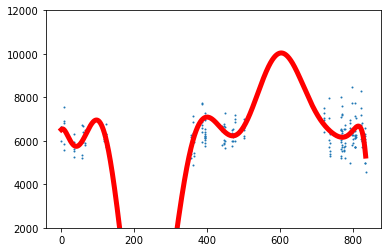

In [367]:
TempQuasa = 4600*(1/(BminV_Quasar*0.62 + 1.7) + 1/(0.92*BminV_Quasar + 0.62))
TempStar = 4600*(1/(BminV_Star*0.62 + 1.7) + 1/(0.92*BminV_Star + 0.62))
origGTime = np.array(origGTime)
#plt.plot(origGTime[0:len3]-min(origGTime[0:len3]),TempQuasa)
xTemp = origGTime[0:len3]-min(origGTime[0:len3])
plt.scatter(xTemp,TempStar, label = "Data Points", s = 1)
#plt.plot(origGTime[0:len3]-min(origGTime[0:len3]),TempStar, label = "Plot")
print(np.mean(TempStar))

z = np.polyfit(xTemp,TempStar, 13)
p = np.poly1d(z)

Time = np.arange(min(xTemp), max(xTemp), 0.01)
plt.plot(Time, p(Time), color = 'red', linewidth = 5, label = "Regression")
plt.ylim(2000, 12000)

357.05007040000055 121.77548640000168
[0.00000000e+00 3.03800000e-03 6.09300000e-03 9.15500000e-03
 1.22060000e-02 8.05035500e+00 8.05336500e+00 8.05641000e+00
 8.05942200e+00 8.06242900e+00 3.49898480e+01 3.49930170e+01
 3.49962010e+01 3.49993900e+01 3.50025740e+01 5.68650280e+01
 5.68685650e+01 5.68720500e+01 5.68755920e+01 5.68791000e+01
 5.98810800e+01 5.98849170e+01 5.98884610e+01 5.98920540e+01
 5.98955760e+01 6.38944880e+01 6.38971570e+01 6.38998300e+01
 6.39025030e+01 6.39051810e+01 1.17841447e+02 1.17844642e+02
 1.17847831e+02 1.17851022e+02 1.17854215e+02 1.21762643e+02
 1.21765836e+02 1.21769023e+02 1.21772301e+02 1.21775486e+02] []


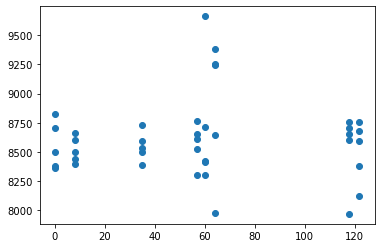

In [375]:
TimeSet1 = []
TempSet1 = [] 
for i in range(len(xTemp)):
    if(i > 0):
        if(xTemp[i] - xTemp[i-1] > 123):
            print(xTemp[i], xTemp[i-1])
            Timeset1 = xTemp[0:i]
            Tempset1 = Temp[0:i]
            break
print(Timeset1, TempSet1)
plt.scatter(Timeset1, Tempset1)